In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_excel('F:\\Downloads\\GS Project Big leader\\GS Data Edited.xlsx')

In [3]:
data

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,0.0,0.0,85.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.007,2607.0,53.4,120.2,NaN,26.3,36.3
1,0.0,0.0,0.0,0.0,0.0,9.803922,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.118,3289.0,43.5,117.5,3.4,20.7,27.5
2,0.0,0.0,0.0,0.0,0.0,19.607843,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.032,2792.0,41.4,120.1,2.3,18.9,27.1
3,0.0,0.0,0.0,0.0,0.0,14.705882,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.077,2979.0,43.1,127.2,3.0,21.7,27.5
4,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.219,8274.0,150.2,151.8,18.3,25.3,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.029,2385.0,36.8,117.1,6.1,NaN,24.9
807,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,2.857143,0.0,1.032,2454.0,37.5,116.5,9.8,NaN,25.3
808,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.030,2542.0,38.3,113.5,8.3,NaN,25.2
809,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.028,2577.0,38.5,114.0,17.7,NaN,25.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 97 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P001       811 non-null    float64
 1   P002       811 non-null    float64
 2   P003       811 non-null    float64
 3   P004       811 non-null    float64
 4   P005       811 non-null    float64
 5   P006       811 non-null    float64
 6   P007       811 non-null    int64  
 7   P008       811 non-null    float64
 8   P009       811 non-null    float64
 9   P010       811 non-null    float64
 10  P011       811 non-null    float64
 11  P012       811 non-null    float64
 12  P013       811 non-null    float64
 13  P014       811 non-null    float64
 14  P015       811 non-null    float64
 15  P016       811 non-null    float64
 16  P017       811 non-null    float64
 17  P018       811 non-null    float64
 18  P019       811 non-null    float64
 19  P020       811 non-null    float64
 20  P021      

In [5]:
data.isnull()

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
807,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
808,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
data.shape

(811, 97)

In [7]:
data.describe()

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,799.000000,807.000000,804.000000,807.000000,655.000000,480.000000,802.000000
mean,0.273463,1.623350,1.629551,0.516042,0.120887,3.534684,0.103576,3.068800,0.590962,0.178913,...,0.216712,0.263926,0.038297,1.023700,2564.840644,42.564055,105.707993,15.224122,23.288690,30.006110
std,3.974863,10.724968,9.555728,5.606937,3.442622,15.629119,2.949639,13.452392,6.149266,3.816834,...,0.554780,0.768806,0.724224,0.095078,2117.114158,33.104157,23.891549,16.565691,12.118263,24.381658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.588000,29.000000,1.200000,30.000000,1.400000,0.025000,1.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.974000,1706.500000,29.600000,96.100000,4.300000,14.380000,20.400000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.022000,2059.000000,33.000000,105.100000,7.300000,23.220000,22.600000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.047000,2516.500000,40.000000,114.500000,21.100000,30.217500,26.750000
max,71.928072,98.039216,85.210578,90.000000,98.039216,100.000000,84.000000,98.039216,100.000000,98.039216,...,3.381643,5.660377,14.563107,1.516000,16294.000000,198.700000,163.800000,91.700000,72.410000,148.600000


In [8]:
data.head(5)

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,0.0,0.0,85.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.007,2607.0,53.4,120.2,NaN,26.3,36.3
1,0.0,0.0,0.0,0.0,0.0,9.803922,0,58.823529,0.0,0.0,...,0.0,0.0,0.0,1.118,3289.0,43.5,117.5,3.4,20.7,27.5
2,0.0,0.0,0.0,0.0,0.0,19.607843,0,58.823529,0.0,0.0,...,0.0,0.0,0.0,1.032,2792.0,41.4,120.1,2.3,18.9,27.1
3,0.0,0.0,0.0,0.0,0.0,14.705882,0,58.823529,0.0,0.0,...,0.0,0.0,0.0,1.077,2979.0,43.1,127.2,3.0,21.7,27.5
4,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.219,8274.0,150.2,151.8,18.3,25.3,102.0


In [9]:
data['P008'].describe

<bound method NDFrame.describe of 0       0.000000
1      58.823529
2      58.823529
3      58.823529
4       0.000000
         ...    
806     0.000000
807     0.000000
808     0.000000
809     0.000000
810     0.000000
Name: P008, Length: 811, dtype: float64>

In [10]:
data['P008'].mean()

3.06880044143514

In [11]:
data['P008'].median()

0.0

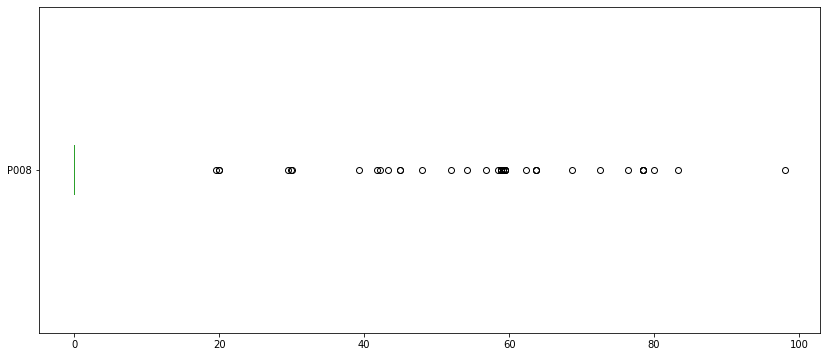

In [12]:
data['P008'].plot(kind='box', vert=False, figsize=(14,6))

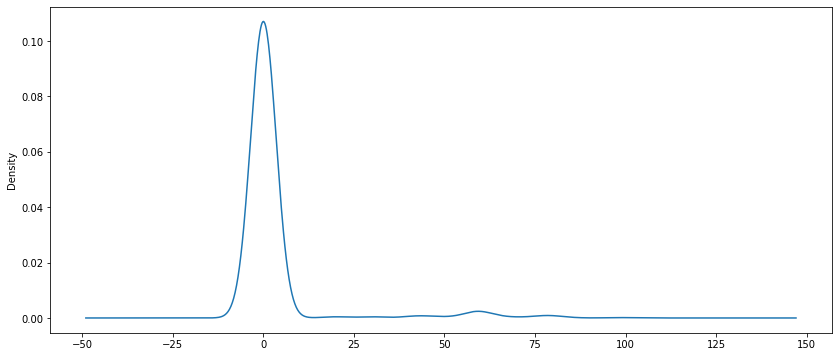

In [13]:
data['P008'].plot(kind='density', figsize=(14,6))

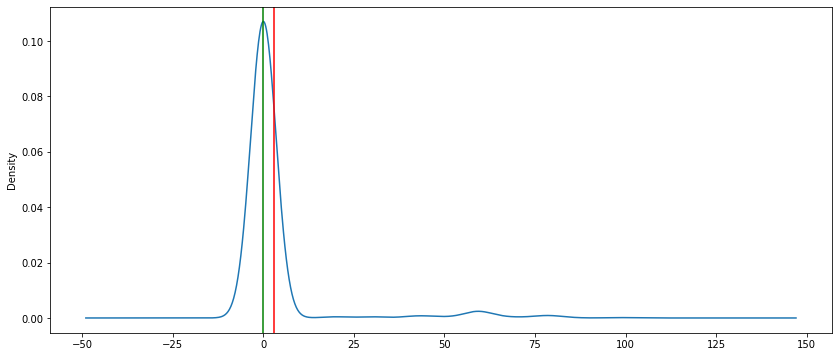

In [14]:
ax = data['P008'].plot(kind='density', figsize=(14,6))
ax.axvline(data['P008'].mean(), color = 'red')
ax.axvline(data['P008'].median(), color = 'green')

Text(0.5, 0, 'materials')

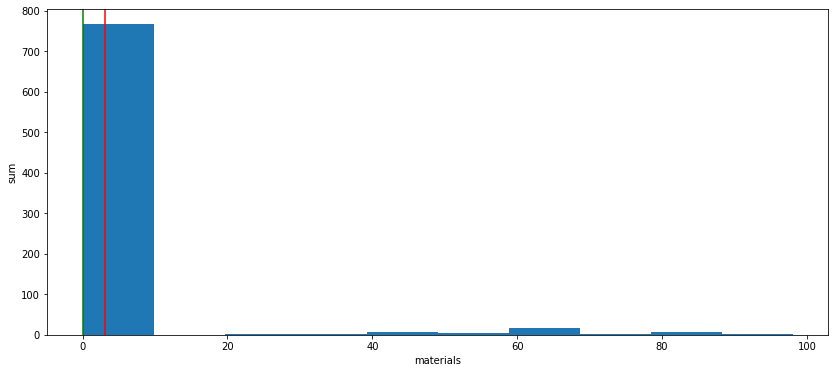

In [15]:
ax = data['P008'].plot(kind='hist', figsize=(14,6))
ax.axvline(data['P008'].mean(), color = 'red')
ax.axvline(data['P008'].median(), color = 'green')
ax.set_ylabel('sum')
ax.set_xlabel('materials')

In [16]:
data['P008'].value_counts()

0.000000     767
58.823529      5
78.431373      4
59.405941      4
59.113300      4
63.663075      3
19.960080      2
44.878049      2
42.156863      1
80.000000      1
30.000000      1
68.627451      1
76.470588      1
58.422590      1
29.411765      1
56.862745      1
83.333333      1
98.039216      1
29.853717      1
19.607843      1
72.549020      1
43.349754      1
62.376238      1
54.187192      1
51.960784      1
48.039216      1
41.747573      1
39.215686      1
Name: P008, dtype: int64

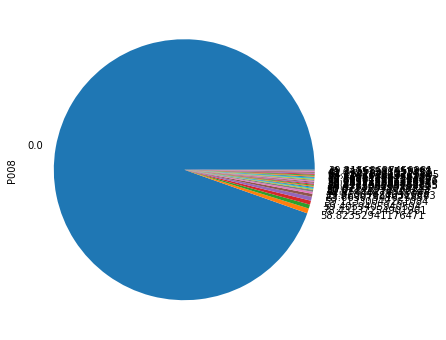

In [17]:
data['P008'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'No. P008')

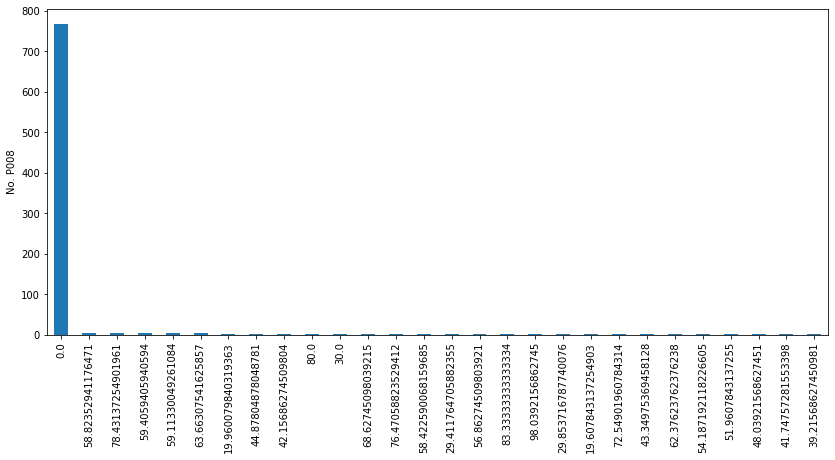

In [18]:
ax = data['P008'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('No. P008')

## Relationship between the columns

In [19]:
corr = data.corr()

corr

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
P001,1.000000,-0.010426,-0.011747,0.165040,-0.002419,-0.015579,-0.002419,-0.015714,-0.006620,-0.003229,...,-0.026908,-0.023647,-0.003643,0.037091,0.073561,0.127760,0.093475,-0.033124,-0.075822,0.123250
P002,-0.010426,1.000000,0.013780,0.013508,-0.005322,-0.034274,-0.005322,-0.034572,-0.014564,-0.007104,...,-0.036558,-0.040541,-0.008014,0.085601,0.120227,0.191974,0.141578,-0.082996,-0.146186,0.194986
P003,-0.011747,0.013780,1.000000,0.011306,-0.005996,-0.038615,-0.005996,0.009051,-0.016409,-0.008003,...,-0.066697,-0.057061,-0.009029,0.170422,0.222353,0.238930,0.198083,-0.066535,-0.066942,0.210425
P004,0.165040,0.013508,0.011306,1.000000,-0.003236,-0.020841,-0.003236,-0.021022,-0.008856,-0.004319,...,-0.035996,-0.031634,-0.004873,0.072198,0.089387,0.136393,0.118879,-0.027076,-0.086768,0.139209
P005,-0.002419,-0.005322,-0.005996,-0.003236,1.000000,-0.007951,-0.001235,-0.008020,-0.003379,-0.001648,...,-0.013734,-0.012070,-0.001859,-0.047575,-0.022106,-0.010202,-0.037335,-0.022735,NaN,-0.006824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
굴곡강도,0.127760,0.191974,0.238930,0.136393,-0.010202,-0.055041,-0.007215,-0.062688,-0.029837,-0.009562,...,-0.139990,-0.094476,-0.056622,0.728241,0.924009,1.000000,0.722539,-0.170515,-0.215067,0.969047
HDT,0.093475,0.141578,0.198083,0.118879,-0.037335,-0.100120,-0.031139,-0.048556,-0.050007,-0.009748,...,-0.152850,-0.045325,-0.119149,0.694633,0.736481,0.722539,1.000000,-0.302358,0.001357,0.677490
IZOD 충격강도,-0.033124,-0.082996,-0.066535,-0.027076,-0.022735,-0.076160,-0.023207,-0.057161,-0.031467,-0.026515,...,0.072659,-0.065952,-0.036192,-0.189979,-0.170063,-0.170515,-0.302358,1.000000,-0.259878,-0.116820
MI,-0.075822,-0.146186,-0.066942,-0.086768,NaN,-0.191621,-0.046382,-0.002142,0.009246,0.019292,...,0.225019,0.181671,-0.121594,-0.119424,-0.210158,-0.215067,0.001357,-0.259878,1.000000,-0.269468


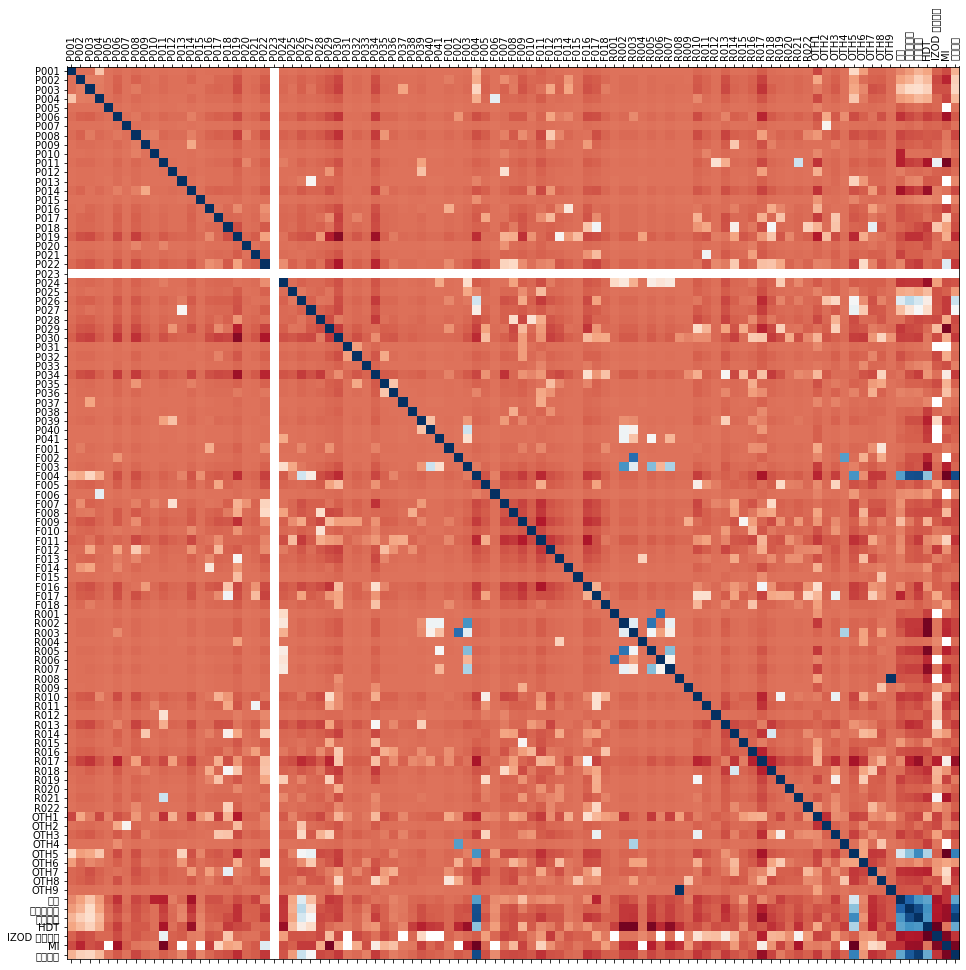

In [20]:
fig = plt.figure(figsize=(16,16))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

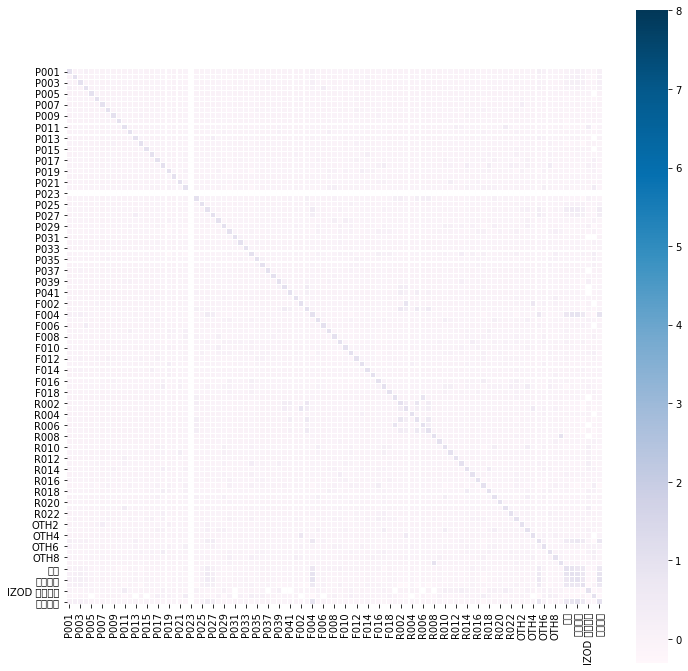

In [21]:
colormap=plt.cm.PuBu
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corr, vmax=8, square=True, linewidth=0.1, linecolor='white', cmap=colormap)


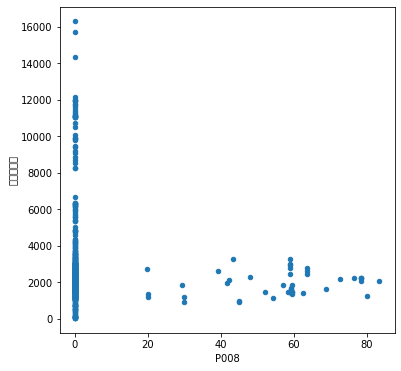

In [22]:
data.plot(kind='scatter', x='P008', y='굴곡탄성률', figsize=(6,6))

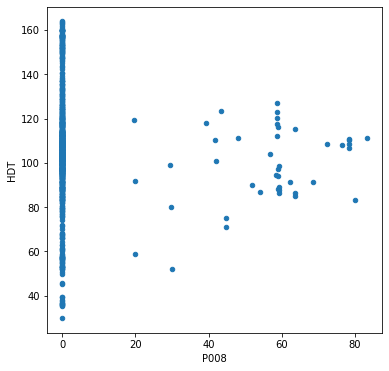

In [23]:
data.plot(kind='scatter', x='P008', y='HDT', figsize=(6,6))

Text(0, 0.5, 'HDT')

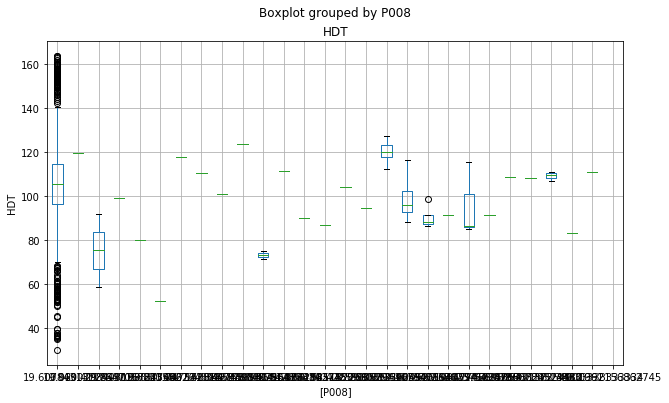

In [24]:
ax = data[['P008','HDT']].boxplot(by='P008', figsize=(10,6))
ax.set_ylabel('HDT')

P008       AxesSubplot(0.125,0.125;0.227941x0.755)
P018    AxesSubplot(0.398529,0.125;0.227941x0.755)
P028    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

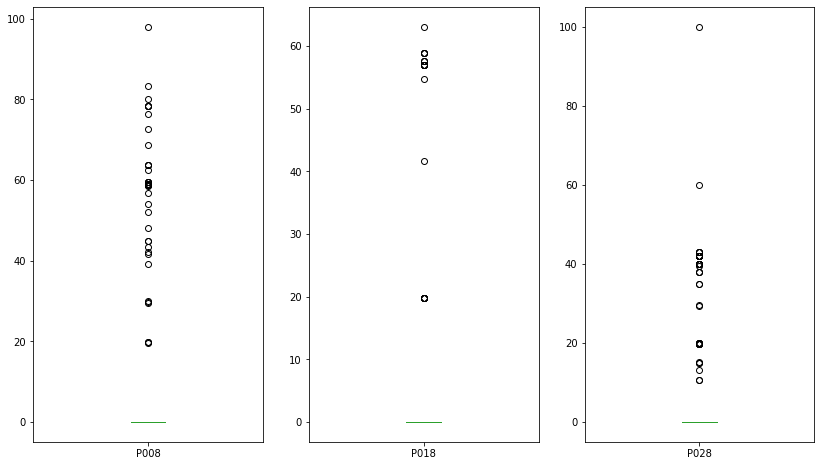

In [25]:
boxplot_cols = ['P008', 'P018', 'P028']
data[boxplot_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(14,8))

In [26]:
data_P006_skip0dd = data.loc[data['P006'] == 100]
data_P006_skip0dd

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
211,0.0,0.0,0.0,0.0,0.0,100.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.897,1256.0,34.0,79.8,NaN,8.03,26.8
395,0.0,0.0,0.0,0.0,0.0,100.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.894,1046.0,31.4,71.4,4.5,8.21,25.7


In [27]:
data_P006_skip0 = data.loc[data['F004'] != 0]
data_P006_skip0['F004']

4      39.215686
15     39.525692
16     19.762846
43     49.751244
46     50.000000
         ...    
650    29.411765
668     4.897160
684     4.901961
729     4.897160
768    29.411765
Name: F004, Length: 81, dtype: float64

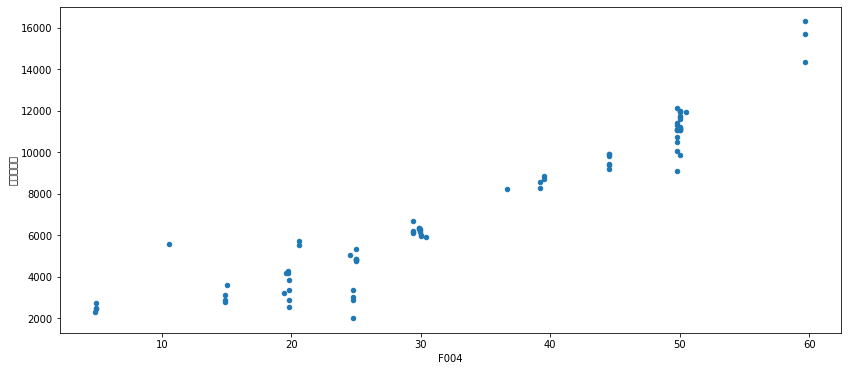

In [28]:
data_P006_skip0.plot(kind='scatter', x='F004', y='굴곡탄성률', figsize=(14,6))

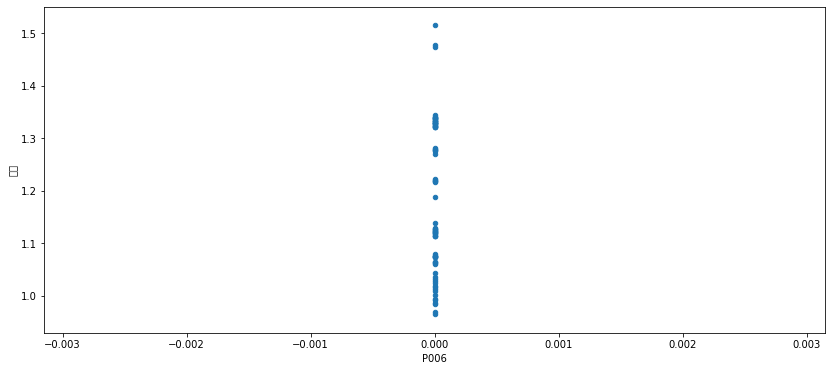

In [29]:
data_P006_skip0.plot(kind='scatter', x='P006', y='비중', figsize=(14,6))

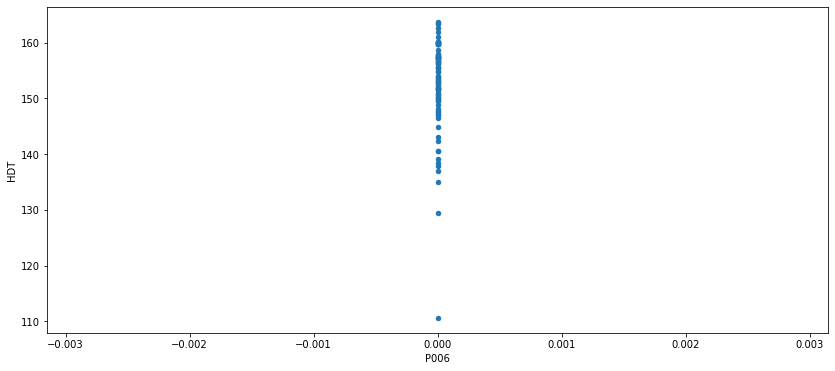

In [30]:
data_P006_skip0.plot(kind='scatter', x='P006', y='HDT', figsize=(14,6))

In [31]:
data_P001_skip0 = data.loc[data['P001'] != 0]
data_P001_skip0

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
403,71.928072,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.076,4864.0,103.3,138.4,5.3,3.2,73.5
404,49.950050,0.0,0.0,21.978022,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.073,4810.0,103.7,137.0,9.4,NaN,73.6
405,59.940060,0.0,0.0,11.988012,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.073,4760.0,103.7,137.8,9.2,NaN,73.2
406,39.960040,0.0,0.0,31.968032,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.076,4844.0,104.4,139.1,9.7,NaN,73.2


In [32]:
data_P002_skip0 = data.loc[data['P002'] != 0]
data_P002_skip0

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
98,0.0,68.627451,4.901961,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.040,2653.0,48.9,118.6,1.5,13.70,33.5
175,0.0,67.961165,9.708738,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.021,2580.0,51.2,119.9,NaN,14.00,36.4
214,0.0,14.084507,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.469484,2.816901,0.0,1.024,2154.0,33.7,106.1,5.1,NaN,61.8
252,0.0,13.145540,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.469484,2.816901,0.0,0.988,1787.0,30.9,93.5,4.0,NaN,22.2
260,0.0,76.470588,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.035,2944.0,53.2,118.6,1.9,13.15,36.1
266,0.0,67.961165,7.766990,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.047,3057.0,53.6,123.2,3.3,13.96,35.6
267,0.0,67.961165,9.708738,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.041,2943.0,53.2,68.1,2.2,14.32,35.1
297,0.0,98.039216,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,0.0,55.882353,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.223,8552.0,161.9,152.5,13.2,NaN,114.0
319,0.0,75.490196,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.036,4185.0,108.3,140.5,10.3,NaN,78.9


In [33]:
data_P003_skip0 = data.loc[data['P003'] != 0]
data_P003_skip0

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,0.0,0.000000,85.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.007,2607.0,53.4,120.2,NaN,26.30,36.3
5,0.0,0.000000,39.215686,0.000000,0.0,0.0,0,39.215686,0.0,0.0,...,0.0,0.000000,0.0,1.036,2590.0,45.9,117.8,NaN,23.80,30.5
6,0.0,0.000000,19.607843,0.000000,0.0,0.0,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.036,2463.0,43.0,112.1,NaN,24.90,28.2
7,0.0,0.000000,58.823529,0.000000,0.0,0.0,0,19.607843,0.0,0.0,...,0.0,0.000000,0.0,1.037,2703.0,49.1,119.3,NaN,24.00,32.3
8,0.0,0.000000,78.431373,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.036,2909.0,52.8,122.6,NaN,22.50,35.0
61,0.0,0.000000,52.423343,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.277,9806.0,167.5,151.5,11.2,3.40,123.6
62,0.0,0.000000,53.465347,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.270,9911.0,165.9,153.1,12.0,5.20,123.2
63,0.0,0.000000,52.423343,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.276,9900.0,168.6,151.8,11.6,3.20,124.0
98,0.0,68.627451,4.901961,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.040,2653.0,48.9,118.6,1.5,13.70,33.5
110,0.0,0.000000,52.423343,0.000000,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.281,9447.0,168.0,150.9,11.0,NaN,113.0


In [34]:
data_P004_skip0 = data.loc[data['P004'] != 0]
data_P004_skip0

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
43,0.00000,0.000000,0.000000,48.258706,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.336,11321.0,169.9,163.6,12.7,0.3,122.9
119,0.00000,0.000000,0.000000,82.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.001,3600.0,100.2,159.7,13.7,NaN,76.9
376,0.00000,0.000000,0.000000,65.384615,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.138,5562.0,82.9,156.4,5.2,NaN,56.7
404,49.95005,0.000000,0.000000,21.978022,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.073,4810.0,103.7,137.0,9.4,NaN,73.6
405,59.94006,0.000000,0.000000,11.988012,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.073,4760.0,103.7,137.8,9.2,NaN,73.2
406,39.96004,0.000000,0.000000,31.968032,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.076,4844.0,104.4,139.1,9.7,NaN,73.2
415,0.00000,0.000000,24.975025,46.953047,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.076,4796.0,106.5,135.0,9.3,NaN,74.3
426,0.00000,66.933067,0.000000,19.980020,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.980,2532.0,52.6,110.9,2.2,NaN,36.5
645,0.00000,0.000000,0.000000,90.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,1468.0,38.7,91.4,15.1,NaN,32.1


In [35]:
data_P005_skip0 = data.loc[data['P005'] != 0]
data_P005_skip0

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
767,0.0,0.0,0.0,0.0,98.039216,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.896,1237.0,33.0,80.4,5.6,NaN,25.3


# Modeling

In [3]:
X = data.iloc[:,:90]
X

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,R022,OTH1,OTH2,OTH3,OTH4,OTH5,OTH6,OTH7,OTH8,OTH9
0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,1.008573,0.0,0.0,0.0,3.530005,0.151286,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.987903,0.0,0.0,0.0,3.528226,0.100806,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.497512,0.0,0.0,0.0,1.990050,0.000000,0.0,0.000000,0.0
3,0.0,0.0,85.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,9.803922,0,58.823529,0.0,0.0,...,0.0,1.960784,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,1.960784,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
807,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,1.904762,0.0,0.0,0.0,0.000000,0.000000,0.0,2.857143,0.0
808,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,1.960784,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
809,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,1.960784,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [3]:
X_P = data.iloc[:,:38]
X_P = X_P.drop(['P023'], axis=1)
X_P

X_P_GS = X_P.iloc[:,:11]
X_P_GS

X_P_O = X_P.iloc[:,11:]
X_P_O_scale = X_P_O/100
X_P_O_scale

,P012,P013,P014,P015,P016,P017,P018,P019,P020,P021,...,P029,P030,P031,P032,P033,P034,P035,P036,P037,P038
0,0.0,0.307615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.307460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.099502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.686275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.686275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.686275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.columns

Index(['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009',
       'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018',
       'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025', 'P026', 'P027',
       'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034', 'P035', 'P036',
       'P037', 'P038', 'P039', 'P040', 'P041', 'F001', 'F002', 'F003', 'F004',
       'F005', 'F006', 'F007', 'F008', 'F009', 'F010', 'F011', 'F012', 'F013',
       'F014', 'F015', 'F016', 'F017', 'F018', 'R001', 'R002', 'R003', 'R004',
       'R005', 'R006', 'R007', 'R008', 'R009', 'R010', 'R011', 'R012', 'R013',
       'R014', 'R015', 'R016', 'R017', 'R018', 'R019', 'R020', 'R021', 'R022',
       'OTH1', 'OTH2', 'OTH3', 'OTH4', 'OTH5', 'OTH6', 'OTH7', 'OTH8', 'OTH9',
       '비중', '굴곡탄성률', '굴곡강도', 'HDT', 'IZOD 충격강도', 'MI', '인장강도'],
      dtype='object')

In [58]:
no_col = []
for i in X.columns:
    bit_mask = X[i] != 0
    rows_nonzero = X.loc[bit_mask]
    n = len(rows_nonzero.index)
    no_col.append(n)
no_col

[4,
 20,
 31,
 9,
 1,
 59,
 1,
 44,
 9,
 2,
 13,
 4,
 3,
 41,
 1,
 20,
 31,
 23,
 158,
 3,
 9,
 92,
 0,
 24,
 9,
 54,
 19,
 49,
 134,
 230,
 3,
 14,
 3,
 168,
 13,
 9,
 2,
 4,
 27,
 1,
 1,
 6,
 2,
 11,
 81,
 37,
 1,
 59,
 40,
 106,
 23,
 179,
 47,
 24,
 9,
 2,
 126,
 81,
 20,
 1,
 7,
 10,
 1,
 7,
 2,
 8,
 2,
 2,
 121,
 30,
 6,
 197,
 29,
 14,
 47,
 306,
 44,
 19,
 9,
 35,
 8,
 560,
 9,
 116,
 1,
 95,
 75,
 160,
 92,
 4]

In [50]:
no_df = pd.DataFrame(data=np.array([no_col]), columns=data.columns)
no_df

no_df.to_excel('F:\\Downloads\\GS Project Big leader\\재료사용횟수.xls')

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,4,20,31,9,1,59,1,44,9,2,...,160,92,4,811,811,811,811,811,811,811


In [15]:
X_F = data.iloc[:,41:59]
X_F

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,29.411765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,19.607843,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,24.509804,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,39.215686,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19.607843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19.607843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19.607843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_R = data.iloc[:,59:81]
X_R

,R001,R002,R003,R004,R005,R006,R007,R008,R009,R010,...,R013,R014,R015,R016,R017,R018,R019,R020,R021,R022
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.803922,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.523810,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.803922,0.0,0.0,0.0,0.0,0.0
809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.803922,0.0,0.0,0.0,0.0,0.0


In [20]:
X_O = data.iloc[:,81:90]
X_O = X_O.drop(['OTH7'], axis=1)
X_O

,OTH1,OTH2,OTH3,OTH4,OTH5,OTH6,OTH8,OTH9
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,1.960784,0.0,0.0,0.0,2.941176,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
806,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
807,1.904762,0.0,0.0,0.0,0.000000,0.0,2.857143,0.0
808,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
809,1.960784,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
result = pca.fit_transform(X_P_O)

result = pd.DataFrame(result, columns=['a', 'b', 'c', 'd','e','f','g','h','i','j'])
result

from sklearn import decomposition

,a,b,c,d,e,f,g,h,i,j
0,5.515192,-9.842615,-2.321097,-19.890533,-2.695838,-25.744111,53.178650,-3.981334,15.303482,-11.468218
1,5.516344,-9.845668,-2.322118,-19.900890,-2.698372,-25.772659,53.249957,-3.986851,15.326061,-11.485885
2,5.052357,-8.445318,-3.007061,-14.378893,-3.064741,-7.116398,-6.800886,-8.970613,-16.063845,-14.554881
3,4.637601,-7.518291,-1.541473,-12.007239,-0.760038,-4.054857,-0.877384,0.266239,-1.715907,2.050595
4,4.637601,-7.518291,-1.541473,-12.007239,-0.760038,-4.054857,-0.877384,0.266239,-1.715907,2.050595
...,...,...,...,...,...,...,...,...,...,...
806,-47.503122,31.896178,-11.036597,2.786231,-2.097730,0.461698,1.823218,2.711849,-1.718879,0.515795
807,-46.013387,30.770051,-10.765308,2.363560,-2.059511,0.332654,1.746058,2.641975,-1.718794,0.559646
808,-47.503122,31.896178,-11.036597,2.786231,-2.097730,0.461698,1.823218,2.711849,-1.718879,0.515795
809,-47.503122,31.896178,-11.036597,2.786231,-2.097730,0.461698,1.823218,2.711849,-1.718879,0.515795


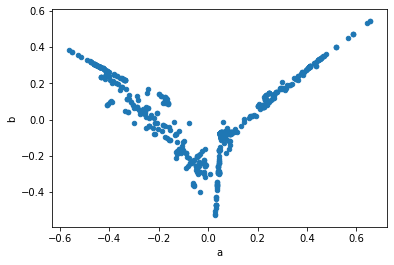

In [16]:
result.plot(kind='scatter', x='a',y='b')

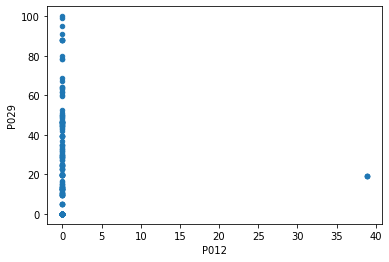

In [19]:
data.plot(kind='scatter', x='P012', y='P029')

In [4]:
y = data.iloc[:,90:]
y

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,1.007,2607.0,53.4,120.2,NaN,26.3,36.3
1,1.118,3289.0,43.5,117.5,3.4,20.7,27.5
2,1.032,2792.0,41.4,120.1,2.3,18.9,27.1
3,1.077,2979.0,43.1,127.2,3.0,21.7,27.5
4,1.219,8274.0,150.2,151.8,18.3,25.3,102.0
...,...,...,...,...,...,...,...
806,1.029,2385.0,36.8,117.1,6.1,NaN,24.9
807,1.032,2454.0,37.5,116.5,9.8,NaN,25.3
808,1.030,2542.0,38.3,113.5,8.3,NaN,25.2
809,1.028,2577.0,38.5,114.0,17.7,NaN,25.4


In [5]:
corr = y.corr()
corr

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
비중,1.000000,0.869586,0.728241,0.694633,-0.189979,-0.119424,0.689369
굴곡탄성률,0.869586,1.000000,0.924009,0.736481,-0.170063,-0.210158,0.895452
굴곡강도,0.728241,0.924009,1.000000,0.722539,-0.170515,-0.215067,0.969047
HDT,0.694633,0.736481,0.722539,1.000000,-0.302358,0.001357,0.677490
IZOD 충격강도,-0.189979,-0.170063,-0.170515,-0.302358,1.000000,-0.259878,-0.116820
MI,-0.119424,-0.210158,-0.215067,0.001357,-0.259878,1.000000,-0.269468
인장강도,0.689369,0.895452,0.969047,0.677490,-0.116820,-0.269468,1.000000


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [39]:
y_train

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
412,1.000,1487.0,34.9,84.7,5.3,11.000,26.3
368,0.897,1086.0,28.7,79.5,5.5,7.490,22.7
398,1.010,1877.0,44.2,97.1,2.2,50.300,30.3
158,0.910,963.0,25.7,92.0,NaN,NaN,23.4
69,1.113,5553.0,122.6,149.5,NaN,11.400,89.6
...,...,...,...,...,...,...,...
71,0.910,1341.0,33.1,95.2,3.9,13.700,24.2
106,1.109,2709.0,31.9,120.2,4.0,16.900,21.1
270,0.933,1262.0,27.5,86.2,12.5,NaN,18.8
435,0.883,434.0,11.1,53.4,84.7,1.057,14.0


In [40]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   비중         799 non-null    float64
 1   굴곡탄성률      807 non-null    float64
 2   굴곡강도       804 non-null    float64
 3   HDT        807 non-null    float64
 4   IZOD 충격강도  655 non-null    float64
 5   MI         480 non-null    float64
 6   인장강도       802 non-null    float64
dtypes: float64(7)
memory usage: 44.5 KB


In [41]:
y.isnull()

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
806,False,False,False,False,False,True,False
807,False,False,False,False,False,True,False
808,False,False,False,False,False,True,False
809,False,False,False,False,False,True,False


In [42]:
y_MI_drop = y.drop(['MI'], axis = 1)
y_MI_drop

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,인장강도
0,1.007,2607.0,53.4,120.2,NaN,36.3
1,1.118,3289.0,43.5,117.5,3.4,27.5
2,1.032,2792.0,41.4,120.1,2.3,27.1
3,1.077,2979.0,43.1,127.2,3.0,27.5
4,1.219,8274.0,150.2,151.8,18.3,102.0
...,...,...,...,...,...,...
806,1.029,2385.0,36.8,117.1,6.1,24.9
807,1.032,2454.0,37.5,116.5,9.8,25.3
808,1.030,2542.0,38.3,113.5,8.3,25.2
809,1.028,2577.0,38.5,114.0,17.7,25.4


In [43]:
y_MI_drop.isnull()

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,인장강도
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
806,False,False,False,False,False,False
807,False,False,False,False,False,False
808,False,False,False,False,False,False
809,False,False,False,False,False,False


In [44]:
data[data.isnull()['비중'] == True]

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
297,0.0,98.039216,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,0.0,0.000000,0.0,0.0,0.0,0.00000,0,63.663075,0.0,0.0,...,0.000000,0.000000,0.0,NaN,2775.0,43.3,84.9,2.5,NaN,26.0
327,0.0,0.000000,0.0,0.0,0.0,0.00000,0,63.663075,0.0,0.0,...,0.000000,0.000000,0.0,NaN,2579.0,42.4,86.5,2.4,NaN,25.5
377,0.0,0.000000,0.0,0.0,0.0,87.97654,0,0.000000,0.0,0.0,...,0.293255,0.000000,0.0,NaN,1093.0,28.7,80.4,13.0,NaN,22.6
471,0.0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,NaN,2059.0,31.3,98.2,10.0,34.3,NaN
472,0.0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.471698,1.886792,0.0,NaN,2396.0,40.4,103.8,3.7,NaN,NaN
507,0.0,0.000000,0.0,0.0,0.0,87.97654,0,0.000000,0.0,0.0,...,0.293255,0.000000,0.0,NaN,1081.0,27.9,77.1,43.6,NaN,21.8
508,0.0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.483092,0.000000,0.0,NaN,1966.0,26.0,105.5,15.3,NaN,17.4
645,0.0,0.000000,0.0,90.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,NaN,1468.0,38.7,91.4,15.1,NaN,32.1
664,0.0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,...,0.293255,0.000000,0.0,NaN,1415.0,35.8,94.1,31.7,NaN,25.9


### 0으로만 이루어진 열 제거

In [45]:
col = data.columns
col[0]
len(col)

97

In [46]:
bit_mask = data['P002'] != 0
rows_nonzero = data.loc[bit_mask]

rows_nan = rows_nonzero.replace(0,np.nan)   # 0값 다 nan로 바꿔줌

rows_nan.dropna(how='all', axis=1)   # 모두 0인 열 제거

,P002,P003,P004,P016,P022,F001,F004,F007,F008,F011,...,OTH6,OTH7,OTH8,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
98,68.627451,4.901961,NaN,NaN,NaN,NaN,NaN,20.588235,NaN,NaN,...,NaN,NaN,NaN,1.040,2653.0,48.9,118.6,1.5,13.70,33.5
175,67.961165,9.708738,NaN,NaN,NaN,NaN,NaN,19.417476,NaN,NaN,...,NaN,NaN,NaN,1.021,2580.0,51.2,119.9,NaN,14.00,36.4
214,14.084507,NaN,NaN,34.741784,14.084507,4.694836,NaN,NaN,NaN,14.084507,...,NaN,0.469484,2.816901,1.024,2154.0,33.7,106.1,5.1,NaN,61.8
252,13.145540,NaN,NaN,34.741784,14.084507,4.694836,NaN,NaN,NaN,14.084507,...,NaN,0.469484,2.816901,0.988,1787.0,30.9,93.5,4.0,NaN,22.2
260,76.470588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.568627,NaN,...,NaN,NaN,NaN,1.035,2944.0,53.2,118.6,1.9,13.15,36.1
266,67.961165,7.766990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.047,3057.0,53.6,123.2,3.3,13.96,35.6
267,67.961165,9.708738,NaN,NaN,NaN,NaN,NaN,19.417476,NaN,NaN,...,NaN,NaN,NaN,1.041,2943.0,53.2,68.1,2.2,14.32,35.1
297,98.039216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,55.882353,NaN,NaN,NaN,NaN,NaN,39.215686,NaN,NaN,NaN,...,NaN,NaN,NaN,1.223,8552.0,161.9,152.5,13.2,NaN,114.0
319,75.490196,NaN,NaN,NaN,NaN,NaN,19.607843,NaN,NaN,NaN,...,NaN,NaN,NaN,1.036,4185.0,108.3,140.5,10.3,NaN,78.9


In [47]:
bit_mask = X['P006'] != 0
rows_nonzero = X.loc[bit_mask]

rows_nan = rows_nonzero.replace(0,np.nan)   # 0값 다 nan로 바꿔줌

rows_nan.dropna(how='all', axis=1)   # 모두 0인 열 제거

,P002,P003,P004,P016,P022,F001,F004,F007,F008,F011,F012,F014,R017,R018,OTH1,OTH3,OTH5,OTH6,OTH7,OTH8
98,68.627451,4.901961,NaN,NaN,NaN,NaN,NaN,20.588235,NaN,NaN,NaN,NaN,3.921569,NaN,1.960784,NaN,NaN,NaN,NaN,NaN
175,67.961165,9.708738,NaN,NaN,NaN,NaN,NaN,19.417476,NaN,NaN,NaN,NaN,NaN,NaN,2.912621,NaN,NaN,NaN,NaN,NaN
214,14.084507,NaN,NaN,34.741784,14.084507,4.694836,NaN,NaN,NaN,14.084507,NaN,NaN,12.206573,NaN,2.816901,NaN,NaN,NaN,0.469484,2.816901
252,13.145540,NaN,NaN,34.741784,14.084507,4.694836,NaN,NaN,NaN,14.084507,NaN,NaN,13.145540,NaN,2.816901,NaN,NaN,NaN,0.469484,2.816901
260,76.470588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.568627,NaN,NaN,NaN,NaN,NaN,1.960784,NaN,NaN,NaN,NaN,NaN
266,67.961165,7.766990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.359223,NaN,NaN,2.912621,NaN,NaN,NaN,NaN,NaN
267,67.961165,9.708738,NaN,NaN,NaN,NaN,NaN,19.417476,NaN,NaN,NaN,NaN,NaN,NaN,2.912621,NaN,NaN,NaN,NaN,NaN
297,98.039216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.960784,NaN,NaN,NaN,NaN,NaN
318,55.882353,NaN,NaN,NaN,NaN,NaN,39.215686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.960784,NaN,2.941176,NaN,NaN,NaN
319,75.490196,NaN,NaN,NaN,NaN,NaN,19.607843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.960784,NaN,2.941176,NaN,NaN,NaN


In [48]:
bit_mask = X['P002'] != 0
rows_nonzero = X.loc[bit_mask]

cols_drop = rows_nonzero.T[(rows_nonzero != 0).any()].T
cols_drop

,P002,P003,P004,P016,P022,F001,F004,F007,F008,F011,F012,F014,R017,R018,OTH1,OTH3,OTH5,OTH6,OTH7,OTH8
98,68.627451,4.901961,0.00000,0.000000,0.000000,0.000000,0.000000,20.588235,0.000000,0.000000,0.000000,0.000000,3.921569,0.000000,1.960784,0.0000,0.000000,0.000000,0.000000,0.000000
175,67.961165,9.708738,0.00000,0.000000,0.000000,0.000000,0.000000,19.417476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.912621,0.0000,0.000000,0.000000,0.000000,0.000000
214,14.084507,0.000000,0.00000,34.741784,14.084507,4.694836,0.000000,0.000000,0.000000,14.084507,0.000000,0.000000,12.206573,0.000000,2.816901,0.0000,0.000000,0.000000,0.469484,2.816901
252,13.145540,0.000000,0.00000,34.741784,14.084507,4.694836,0.000000,0.000000,0.000000,14.084507,0.000000,0.000000,13.145540,0.000000,2.816901,0.0000,0.000000,0.000000,0.469484,2.816901
260,76.470588,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,21.568627,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,0.0000,0.000000,0.000000,0.000000,0.000000
266,67.961165,7.766990,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.359223,0.000000,0.000000,2.912621,0.0000,0.000000,0.000000,0.000000,0.000000
267,67.961165,9.708738,0.00000,0.000000,0.000000,0.000000,0.000000,19.417476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.912621,0.0000,0.000000,0.000000,0.000000,0.000000
297,98.039216,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,0.0000,0.000000,0.000000,0.000000,0.000000
318,55.882353,0.000000,0.00000,0.000000,0.000000,0.000000,39.215686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,0.0000,2.941176,0.000000,0.000000,0.000000
319,75.490196,0.000000,0.00000,0.000000,0.000000,0.000000,19.607843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,0.0000,2.941176,0.000000,0.000000,0.000000


In [16]:
PP = 'F012'

bit_mask = data[PP] != 0
rows_nonzero = data.loc[bit_mask]

cols_drop = rows_nonzero.T[(rows_nonzero != 0).any()].T
cols_drop

cols_drop.to_excel('F:\\Downloads\\GS Project Big leader\\F012.xls')

In [12]:
PP = 'R017'

bit_mask = data[PP] != 0
rows_nonzero = data.loc[bit_mask]

cols_drop = rows_nonzero.T[(rows_nonzero != 0).any()].T
cols_drop

ddddd =cols_drop.sort_values(by=['IZOD 충격강도'] ,ascending=False)

P003_R017 = ddddd.loc[ddddd['P008'] != 0]

P003_R017.to_excel('F:\\Downloads\\GS Project Big leader\\P008_R017.xls')

In [109]:
pp = cols_drop.loc[(cols_drop[PP] >= 30) & (cols_drop[PP] < 35)]
pp

pp_1 = pp.T[(pp != 0).any()].T
pp_1

pp_1.sort_values(by=[PP] ,ascending=False)

,P014,P026,P029,P030,P034,F004,F009,F011,F016,F017,...,OTH5,OTH7,OTH8,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
169,0.000000,0.000000,0.000000,14.778325,34.482759,0.000000,0.000000,32.512315,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.138,2893.0,35.2,118.7,1.64,18.20,21.8
100,0.000000,0.000000,0.000000,33.980583,33.980583,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.912621,0.895,945.0,22.1,75.6,45.60,NaN,18.5
498,0.000000,0.000000,0.000000,14.778325,33.497537,0.000000,0.000000,33.497537,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.144,2951.0,35.4,119.8,23.30,20.80,22.5
700,0.000000,0.000000,0.000000,14.734774,33.398821,0.000000,0.000000,26.522593,0.000000,0.000000,...,0.000000,0.294695,0.000000,1.078,2046.0,NaN,100.2,44.40,33.20,19.0
347,0.000000,0.000000,28.436019,14.218009,33.175355,0.000000,6.635071,0.000000,0.000000,0.000000,...,0.000000,0.473934,1.421801,0.936,1607.0,35.0,100.7,7.60,30.20,23.9
699,0.000000,0.000000,0.000000,14.734774,32.416503,0.000000,0.000000,26.522593,0.000000,0.000000,...,0.000000,0.294695,0.000000,1.085,1975.0,NaN,100.1,7.30,24.60,18.5
323,0.000000,0.000000,16.666667,0.000000,32.352941,0.000000,32.352941,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.136,2781.0,36.0,120.0,3.90,NaN,23.3
344,0.000000,0.000000,13.725490,0.000000,32.352941,0.000000,0.000000,0.000000,32.352941,0.000000,...,0.000000,0.000000,0.000000,1.136,3009.0,34.2,119.2,5.90,NaN,22.5
345,0.000000,0.000000,13.725490,0.000000,32.352941,0.000000,0.000000,0.000000,32.352941,0.000000,...,0.000000,0.000000,0.000000,1.124,2928.0,34.4,120.3,6.30,NaN,22.8
357,0.000000,18.691589,0.000000,18.691589,31.775701,0.000000,0.000000,0.000000,6.542056,6.542056,...,0.000000,0.467290,2.803738,0.993,2819.0,37.7,116.0,4.60,32.47,24.9


In [80]:
cols_drop.to_excel('F:\\Downloads\\GS Project Big leader\\P034.xls')

In [ ]:
row = rows_nonzero.index
row

In [ ]:
rows_nonzero.loc[:,'P001']

In [112]:
data100 = data == 100

In [113]:
data100.to_excel('F:\\Downloads\\GS Project Big leader\\percent100.xls')

In [6]:
data_MI = data.loc[(data['비중'] >= ) & (data['비중'] < 4)]
data_MI

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
46,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.333,11105.0,98.9,163.8,14.5,3.70,148.6
61,0.000000,0.000000,52.423343,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.277,9806.0,167.5,151.5,11.2,3.40,123.6
63,0.000000,0.000000,52.423343,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.276,9900.0,168.6,151.8,11.6,3.20,124.0
403,71.928072,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.076,4864.0,103.3,138.4,5.3,3.20,73.5
622,0.000000,66.666667,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.124,5894.0,133.6,159.8,12.0,3.32,99.4
639,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.938,166.0,3.7,39.4,NaN,3.80,9.5
643,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.926,43.0,2.4,35.2,NaN,3.00,8.3


In [7]:
data_MI_ed = data_MI.T[(data_MI != 0).any()].T
data_MI_ed

,P001,P002,P003,P024,P026,F003,F004,R002,R003,R005,...,OTH1,OTH5,OTH6,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
46,0.000000,0.000000,0.000000,0.0,47.0,0.0,50.000000,0.0,0.0,0.0,...,0.000000,3.000000,0.000000,1.333,11105.0,98.9,163.8,14.5,3.70,148.6
61,0.000000,0.000000,52.423343,0.0,0.0,0.0,44.510386,0.0,0.0,0.0,...,0.989120,1.978239,0.098912,1.277,9806.0,167.5,151.5,11.2,3.40,123.6
63,0.000000,0.000000,52.423343,0.0,0.0,0.0,44.510386,0.0,0.0,0.0,...,0.989120,1.978239,0.098912,1.276,9900.0,168.6,151.8,11.6,3.20,124.0
403,71.928072,0.000000,0.000000,0.0,0.0,0.0,24.975025,0.0,0.0,0.0,...,0.000000,2.997003,0.099900,1.076,4864.0,103.3,138.4,5.3,3.20,73.5
622,0.000000,66.666667,0.000000,0.0,0.0,0.0,30.392157,0.0,0.0,0.0,...,1.960784,0.980392,0.000000,1.124,5894.0,133.6,159.8,12.0,3.32,99.4
639,0.000000,0.000000,0.000000,30.0,0.0,5.0,0.000000,25.0,0.0,20.0,...,0.000000,0.000000,0.000000,0.938,166.0,3.7,39.4,NaN,3.80,9.5
643,0.000000,0.000000,0.000000,23.0,0.0,5.0,0.000000,0.0,15.0,0.0,...,0.000000,0.000000,0.000000,0.926,43.0,2.4,35.2,NaN,3.00,8.3


In [8]:
data_MI_ed.to_excel('F:\\Downloads\\GS Project Big leader\\data_MI_ed.xls')

In [25]:
ddda = data.loc[y['굴곡탄성률']*0.0144+5.541 > y['굴곡강도']]
ddda

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
1,0.0,0.0,0.0,0.0,0.0,9.803922,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.118,3289.0,43.5,117.5,3.4,20.7,27.5
2,0.0,0.0,0.0,0.0,0.0,19.607843,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.032,2792.0,41.4,120.1,2.3,18.9,27.1
3,0.0,0.0,0.0,0.0,0.0,14.705882,0,58.823529,0.0,0.0,...,0.0,0.000000,0.0,1.077,2979.0,43.1,127.2,3.0,21.7,27.5
9,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.087,1764.0,25.1,104.2,4.0,43.3,17.7
10,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.087,1731.0,24.7,107.1,19.6,42.3,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.029,2385.0,36.8,117.1,6.1,NaN,24.9
807,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,2.857143,0.0,1.032,2454.0,37.5,116.5,9.8,NaN,25.3
808,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.030,2542.0,38.3,113.5,8.3,NaN,25.2
809,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.028,2577.0,38.5,114.0,17.7,NaN,25.4


In [24]:
dddb = data.loc[y['굴곡탄성률']*0.0144+5.541 <= y['굴곡강도']]
dddb

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
0,0.0,0.0,85.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,1.007,2607.0,53.4,120.2,NaN,26.30,36.3
4,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,1.219,8274.0,150.2,151.8,18.3,25.30,102.0
5,0.0,0.0,39.215686,0.0,0.0,0.0,0,39.215686,0.0,0.0,...,0.000000,0.000000,0.0,1.036,2590.0,45.9,117.8,NaN,23.80,30.5
6,0.0,0.0,19.607843,0.0,0.0,0.0,0,58.823529,0.0,0.0,...,0.000000,0.000000,0.0,1.036,2463.0,43.0,112.1,NaN,24.90,28.2
7,0.0,0.0,58.823529,0.0,0.0,0.0,0,19.607843,0.0,0.0,...,0.000000,0.000000,0.0,1.037,2703.0,49.1,119.3,NaN,24.00,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.948,1554.0,30.1,96.6,60.9,13.48,21.3
790,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.929,1427.0,29.0,82.2,15.3,29.58,21.0
799,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.471698,1.886792,0.0,0.938,2657.0,45.2,109.7,4.1,29.21,29.9
801,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.471698,1.886792,0.0,0.936,2489.0,42.5,103.6,3.5,27.00,28.5


In [27]:
ddda_lim = data.loc[(y['굴곡탄성률']*0.0144+5.541 <= y['굴곡강도']) & (y['굴곡강도'] >= 60.6 )]
ddda_lim

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.219,8274.0,150.2,151.8,18.3,25.3,102.0
15,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.216,8705.0,165.0,152.8,10.3,NaN,112.0
16,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.043,4267.0,113.0,147.2,7.7,NaN,88.8
43,0.0,0.000000,0.000000,48.258706,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.336,11321.0,169.9,163.6,12.7,0.3,122.9
61,0.0,0.000000,52.423343,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.277,9806.0,167.5,151.5,11.2,3.4,123.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.219,6672.0,148.6,162.7,11.5,NaN,106.0
668,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.968,2514.0,69.8,153.4,4.1,20.0,49.9
729,0.0,0.000000,85.210578,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.964,2464.0,66.4,148.1,4.0,14.0,46.8
764,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.973,2971.0,60.6,124.2,3.6,13.0,39.1


In [28]:
ddda_lim_ed = ddda_lim.T[(ddda_lim != 0).any()].T
ddda_lim_ed

,P001,P002,P003,P004,P015,P025,P026,P027,P029,P030,...,OTH5,OTH6,OTH7,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,2.941176,0.000000,0.0,1.219,8274.0,150.2,151.8,18.3,25.3,102.0
15,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,56.324111,0.0,0.0,...,2.964427,0.197628,0.0,1.216,8705.0,165.0,152.8,10.3,NaN,112.0
16,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,76.086957,0.0,0.0,...,2.964427,0.197628,0.0,1.043,4267.0,113.0,147.2,7.7,NaN,88.8
43,0.0,0.000000,0.000000,48.258706,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1.492537,0.000000,0.0,1.336,11321.0,169.9,163.6,12.7,0.3,122.9
61,0.0,0.000000,52.423343,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1.978239,0.098912,0.0,1.277,9806.0,167.5,151.5,11.2,3.4,123.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.000000,0.000000,0.000000,0.0,39.215686,16.666667,0.000000,0.0,0.0,...,2.941176,0.000000,0.0,1.219,6672.0,148.6,162.7,11.5,NaN,106.0
668,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,85.210578,0.0,0.0,...,1.958864,0.097943,0.0,0.968,2514.0,69.8,153.4,4.1,20.0,49.9
729,0.0,0.000000,85.210578,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1.958864,0.097943,0.0,0.964,2464.0,66.4,148.1,4.0,14.0,46.8
764,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.049480,0.0,0.973,2971.0,60.6,124.2,3.6,13.0,39.1


In [30]:
dddb_lim = data.loc[(y['굴곡탄성률']*0.0144+5.541 >= y['굴곡강도']) & (y['굴곡탄성률'] >= 3553 )]
dddb_lim

,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,OTH7,OTH8,OTH9,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
46,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.333,11105.0,98.9,163.8,14.5,3.70,148.6
47,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.338,11046.0,95.9,163.3,13.9,4.80,145.3
244,0.0,0.000000,50.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.330,11127.0,121.9,160.1,7.7,NaN,83.1
245,0.0,0.000000,30.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.322,11206.0,118.2,159.9,10.1,NaN,72.3
246,0.0,0.000000,20.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.330,11077.0,116.5,159.7,21.3,NaN,71.8
247,0.0,0.000000,40.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.324,9873.0,120.9,160.1,8.7,NaN,77.8
280,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.084,3901.0,52.8,133.6,2.3,NaN,33.3
281,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.223,5787.0,60.7,143.9,2.3,NaN,37.6
286,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.123,4560.0,60.8,137.1,2.6,NaN,37.8
303,0.0,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.516,16294.0,185.6,157.9,10.2,NaN,115.6


In [31]:
dddb_lim_ed = dddb_lim.T[(dddb_lim != 0).any()].T
dddb_lim_ed

,P002,P003,P004,P013,P019,P022,P025,P026,P027,P029,...,OTH3,OTH5,OTH6,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
46,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,47.000000,0.0,0.000000,...,0.000000,3.000000,0.000000,1.333,11105.0,98.9,163.8,14.5,3.70,148.6
47,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,45.000000,0.0,0.000000,...,0.000000,3.000000,0.000000,1.338,11046.0,95.9,163.3,13.9,4.80,145.3
244,0.000000,50.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.330,11127.0,121.9,160.1,7.7,NaN,83.1
245,0.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.0,0.000000,...,0.000000,0.000000,0.000000,1.322,11206.0,118.2,159.9,10.1,NaN,72.3
246,0.000000,20.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,30.0,0.000000,...,0.000000,0.000000,0.000000,1.330,11077.0,116.5,159.7,21.3,NaN,71.8
247,0.000000,40.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,10.0,0.000000,...,0.000000,0.000000,0.000000,1.324,9873.0,120.9,160.1,8.7,NaN,77.8
280,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,60.000000,...,0.000000,0.000000,0.000000,1.084,3901.0,52.8,133.6,2.3,NaN,33.3
281,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,45.0,0.000000,0.0,15.000000,...,0.000000,0.000000,0.000000,1.223,5787.0,60.7,143.9,2.3,NaN,37.6
286,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,50.0,0.000000,0.0,20.000000,...,0.000000,0.000000,0.000000,1.123,4560.0,60.8,137.1,2.6,NaN,37.8
303,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,37.810945,0.0,0.000000,...,0.000000,1.990050,0.000000,1.516,16294.0,185.6,157.9,10.2,NaN,115.6


In [29]:
ddda_lim_ed.to_excel('F:\\Downloads\\GS Project Big leader\\굴곡탄성률강도above_lim.xls')

In [32]:
dddb_lim_ed.to_excel('F:\\Downloads\\GS Project Big leader\\굴곡탄성률강도below_lim.xls')